# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
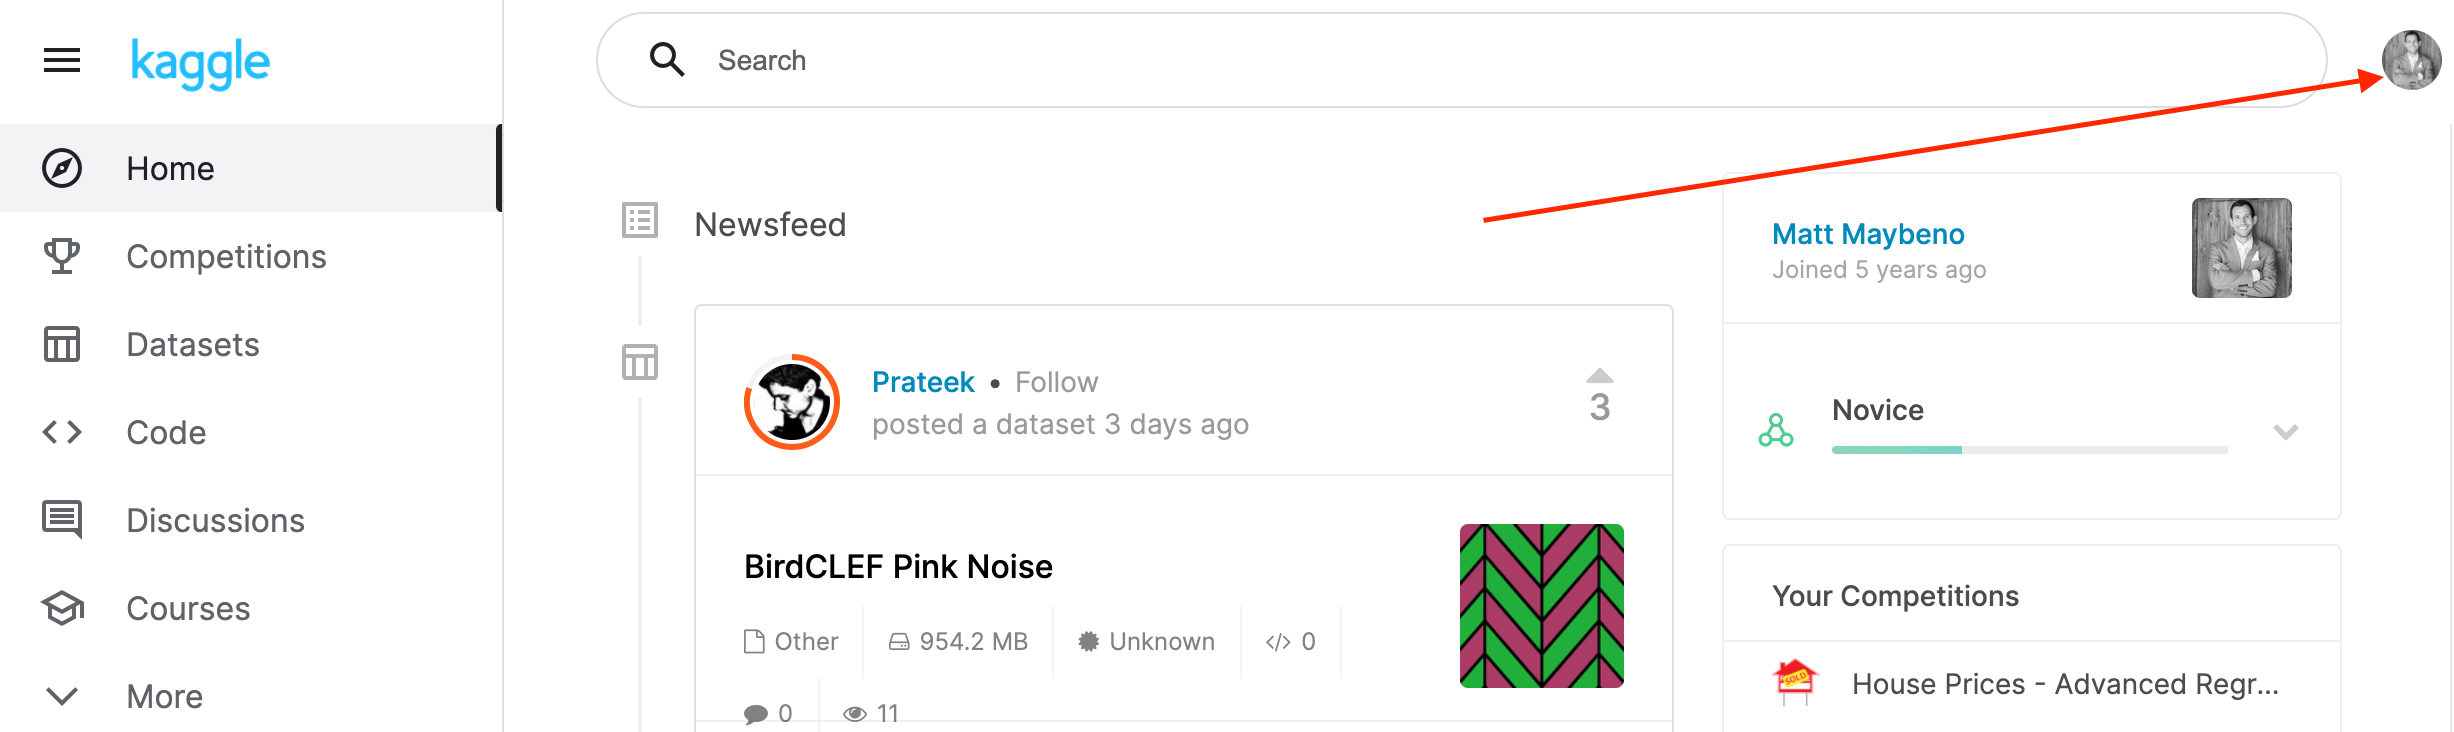
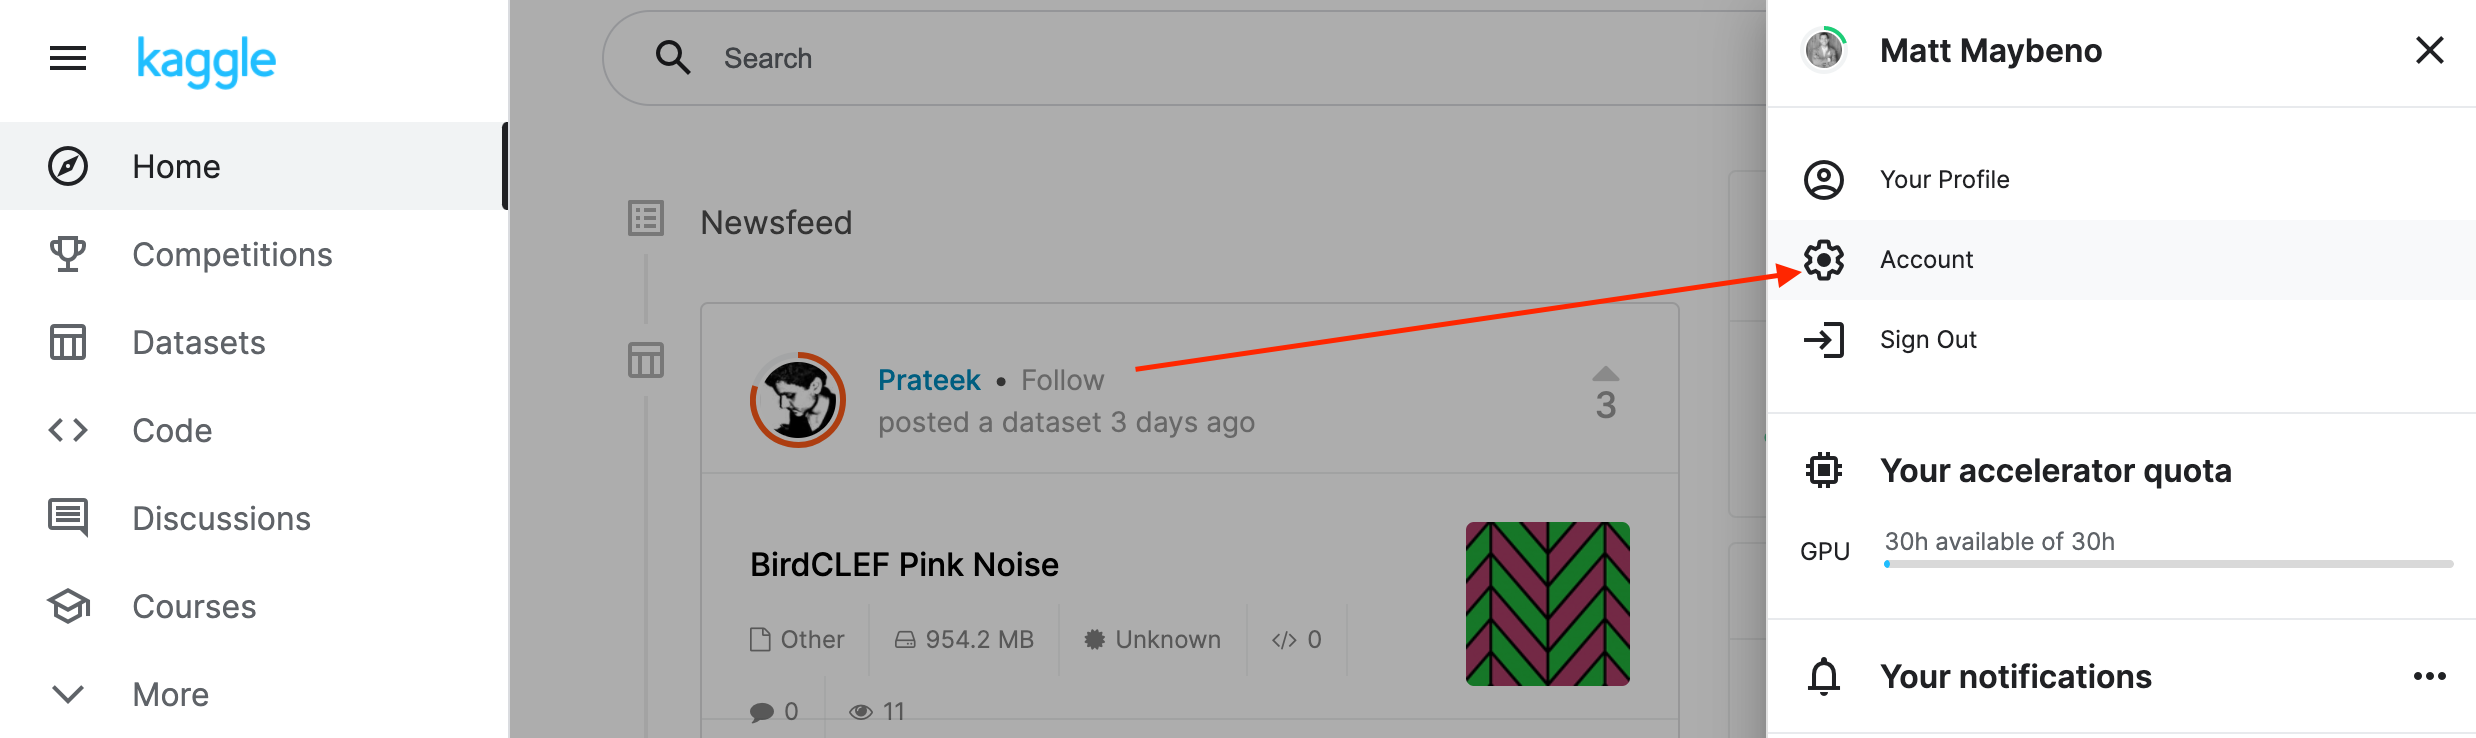
2. Scroll down to API and click Create New API Token.
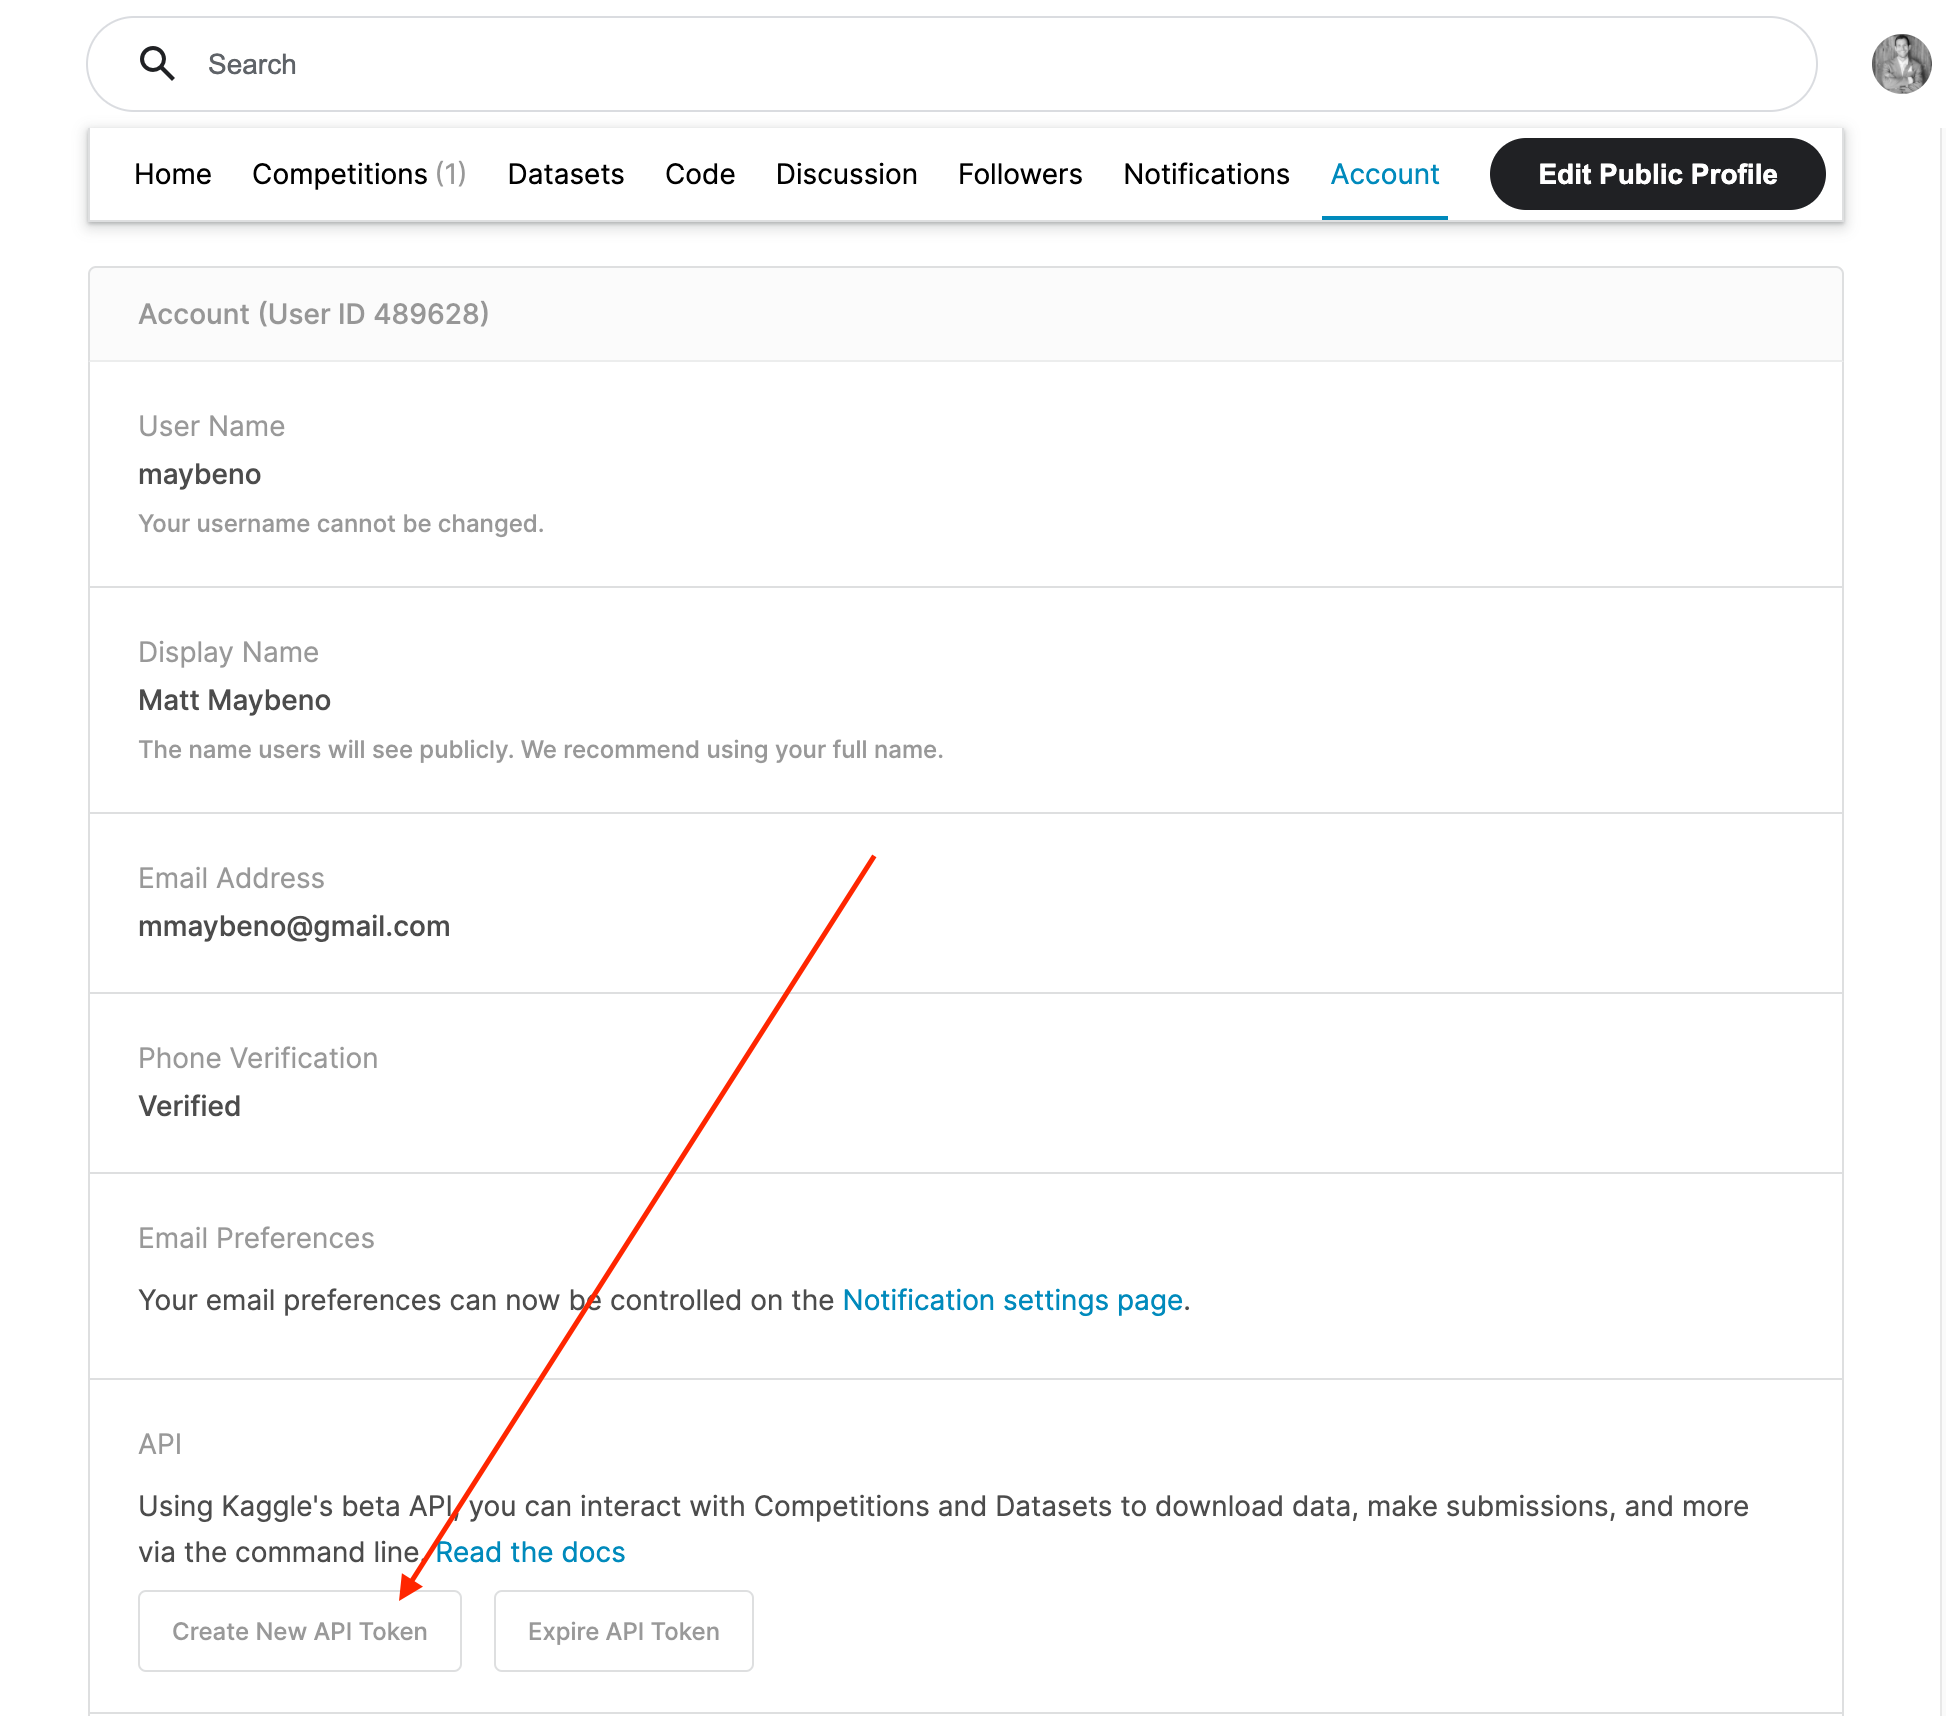
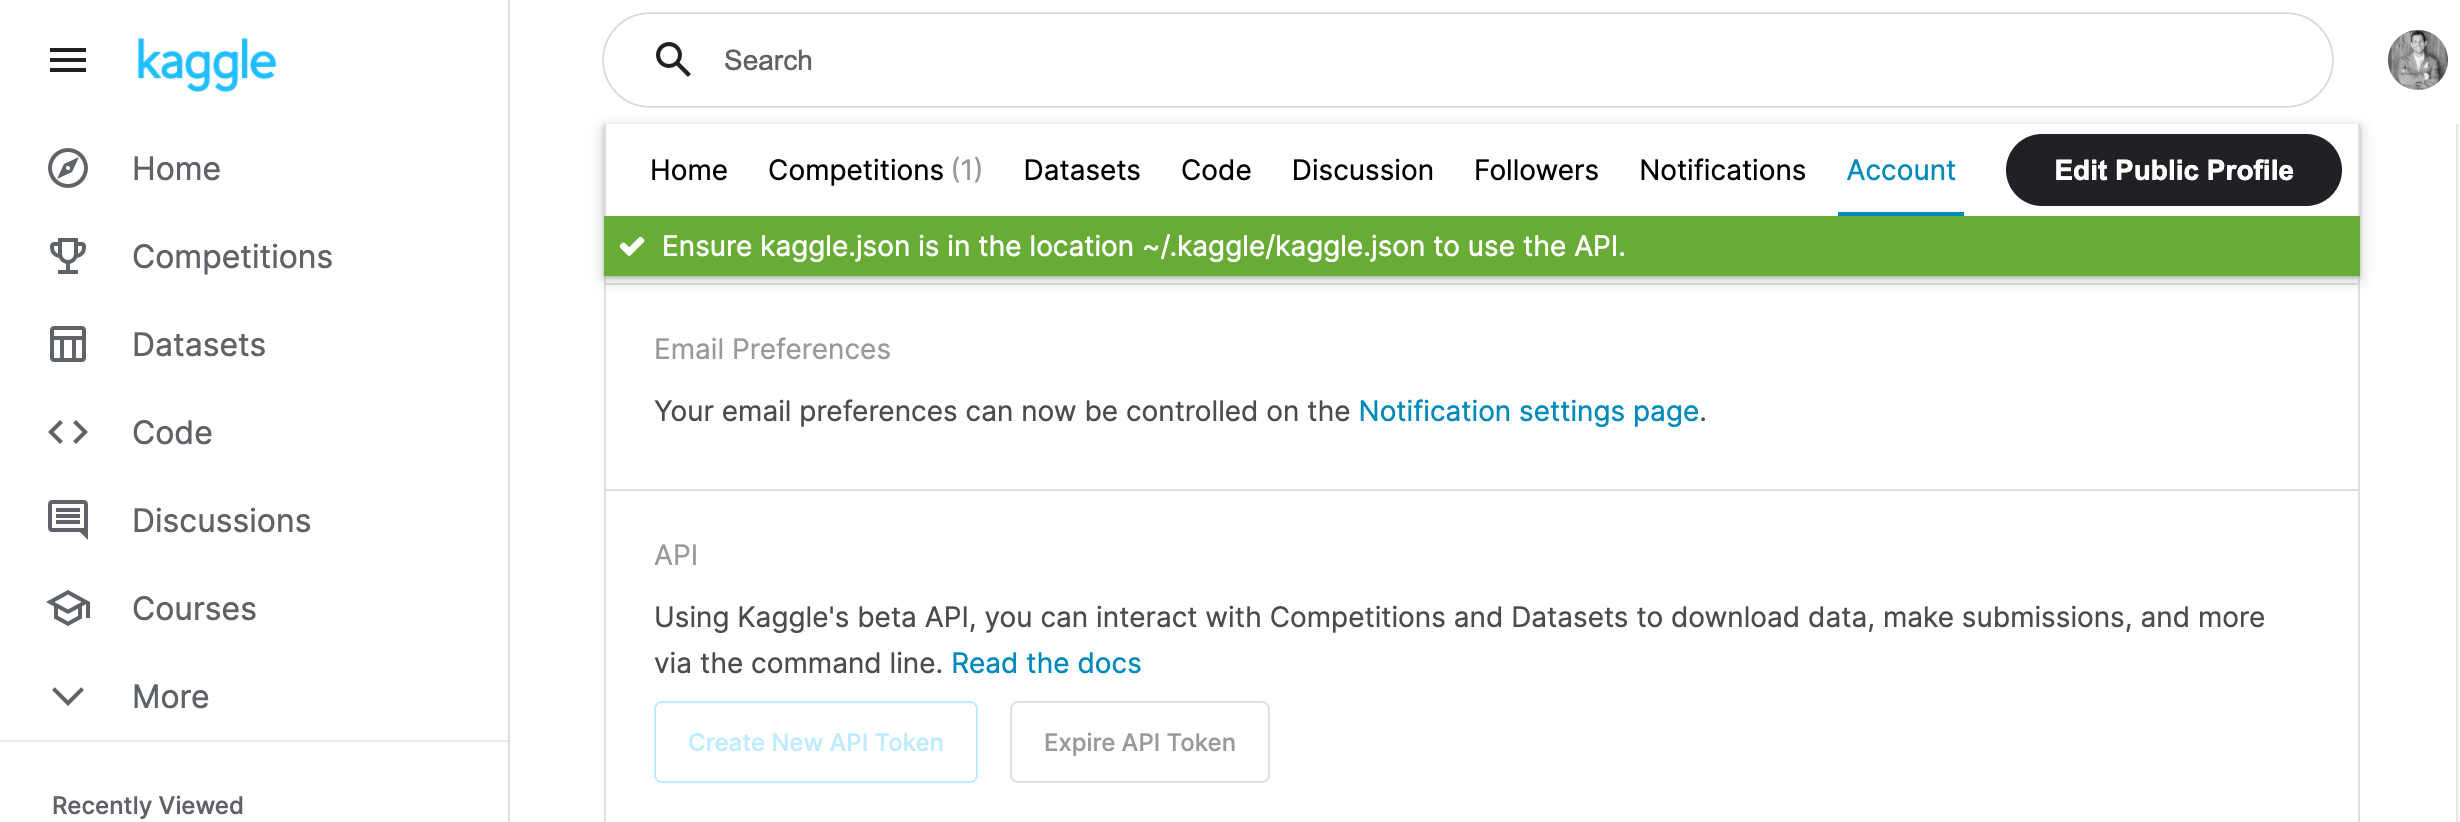
3. Open up `kaggle.json` and use the username and key.
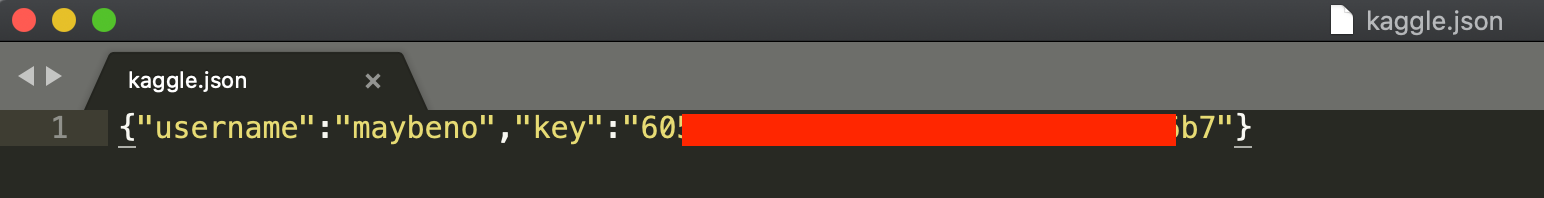

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     |████████████████████████████████| 2.1 MB 32.1 MB/s            
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 1.3 MB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.3.0
    Uninstalling setuptools-59.3.0:
      Successfully uninstalled setuptools-59.3.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 25.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 35.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=236c1b3b0f6e1830d8409cef7c772b36332034b465f3e44fad72b183ca05e6e4
  Stored in directory: /root/.cache/pip/wheels/9f/9e/ac/f24f30e119df735

### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "kr1shn6"
kaggle_key = "30facf08f77e16221c2a269a0242866f"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [8]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.4 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=521de080f786a2bb5f1a4f4fc489edd98e85203907e29d8f9935946e57a7ccb9
  Stored in directory: /root/.cache/pip/wheels/fd/97/a6/3372cb23468915cbcf108338dd29c73379fd1a55828ec608ba
Successfully built kaggle


### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
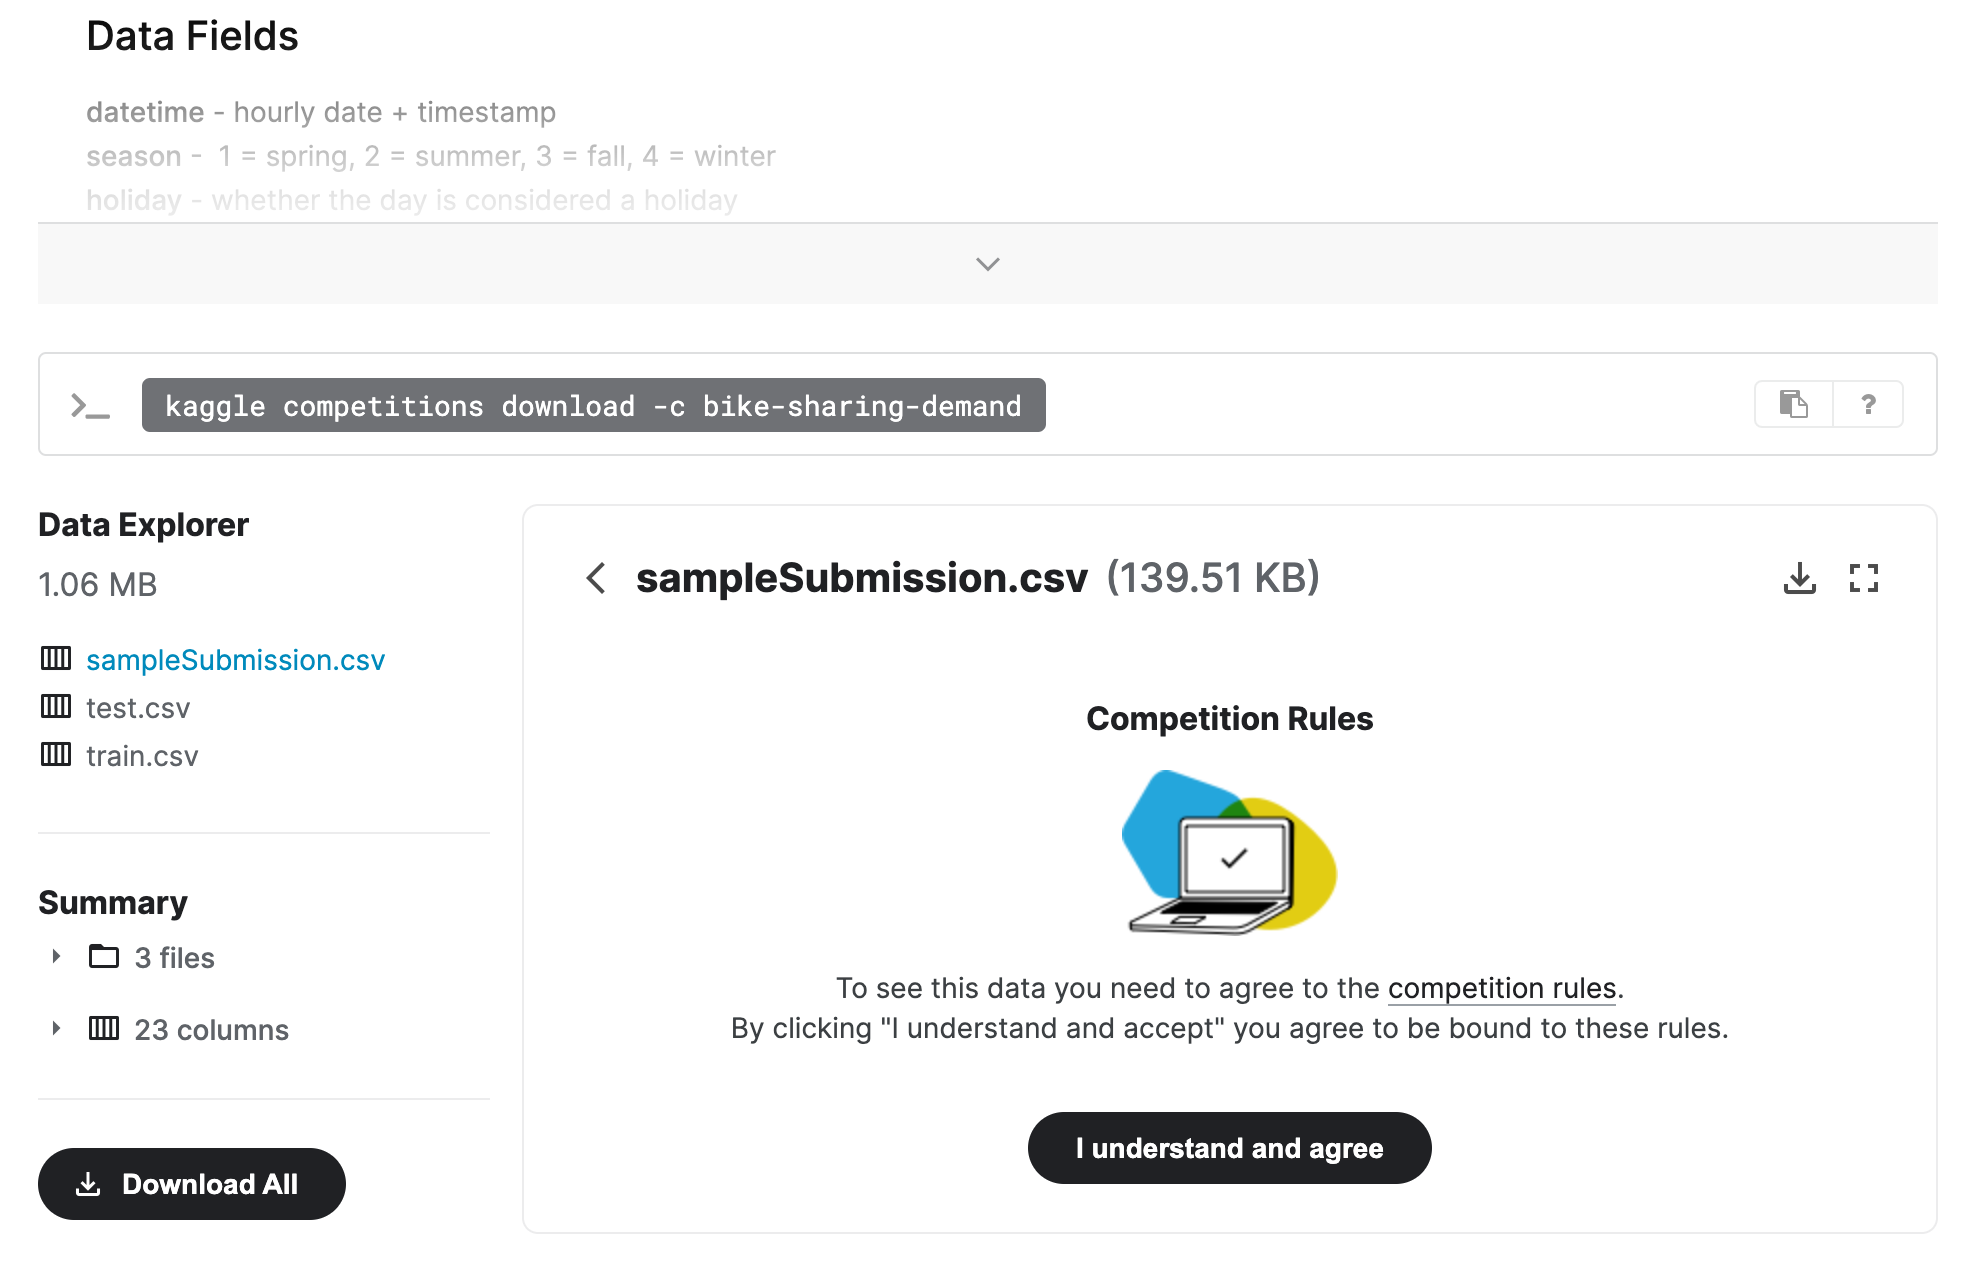

In [11]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 7.93MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [13]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [14]:
# Run this cell to import or install the Data Wrangler widget to show automatic visualization and generate code to fix data quality issues

try:
    import sagemaker_datawrangler
except ImportError:
    !pip install --upgrade sagemaker-datawrangler
    import sagemaker_datawrangler

# Display Pandas DataFrame to view the widget: df, display(df), df.sample()... 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.9/378.9 kB 5.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 2.1 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.9/123.9 kB 2.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 1.6 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 5.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.8/529.8 kB 10.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.0/424.0 kB 9.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 1.7 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.9/285.9 kB 6.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.8 MB/s eta 0:00:00
 

In [19]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv",parse_dates=["datetime"])
train.head()

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  

In [20]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

In [21]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv",parse_dates=["datetime"])
test.head()

             datetime  season  holiday  workingday  weather   temp   atemp  \
0 2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1 2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2 2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3 2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4 2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014  

In [22]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv",parse_dates=["datetime"])
submission.head()

             datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [25]:
train_data = train

# Define the label column
label = 'count'


# Define the evaluation metric
eval_metric = 'root_mean_squared_error'

# Set the time limit
time_limit = 600

# Set the preset
preset = 'best_quality'

# Create the predictor
predictor = TabularPredictor(label=label, eval_metric=eval_metric, 
                             learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(
    train_data=train_data, 
    time_limit=time_limit, 
    presets=preset
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230528_210642/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230528_210642/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 11
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

### Review AutoGluon's training run with ranking of models that did the best.

In [26]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.099799      15.355100  549.653708                0.000796           0.313764            3       True         14
1   RandomForestMSE_BAG_L2  -53.411253      12.014673  409.634342                0.596428          26.507615            2       True         12
2          LightGBM_BAG_L2  -55.177207      11.662676  409.062004                0.244431          25.935277            2       True         11
3          CatBoost_BAG_L2  -55.572998      11.474988  443.760034                0.056743          60.633307            2       True         13
4        LightGBMXT_BAG_L2  -60.210742      14.456702  436.263745                3.038457          53.137018            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.103669    0.029130         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

### Create predictions from test dataset

In [27]:
predictions = predictor.predict(test)
predictions.head()

0    23.758947
1    41.277710
2    45.014797
3    48.974281
4    51.911652
Name: count, dtype: float32

In [28]:
predictions.describe()

count    6493.000000
mean      101.020172
std        90.073212
min         3.378276
25%        20.027142
50%        64.318069
75%       167.423874
max       363.106232
Name: count, dtype: float64

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [30]:
# Describe the `predictions` series to see if there are any negative values
# How many negative values do we have?
# Set them to zero
predictions[predictions<0] = 0

### Set predictions to submission dataframe, save, and submit

In [31]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [32]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 411kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [33]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-05-28 21:23:03  first raw submission  complete  1.78979      1.78979       


#### Initial score of `1.789`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>],
       [<AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

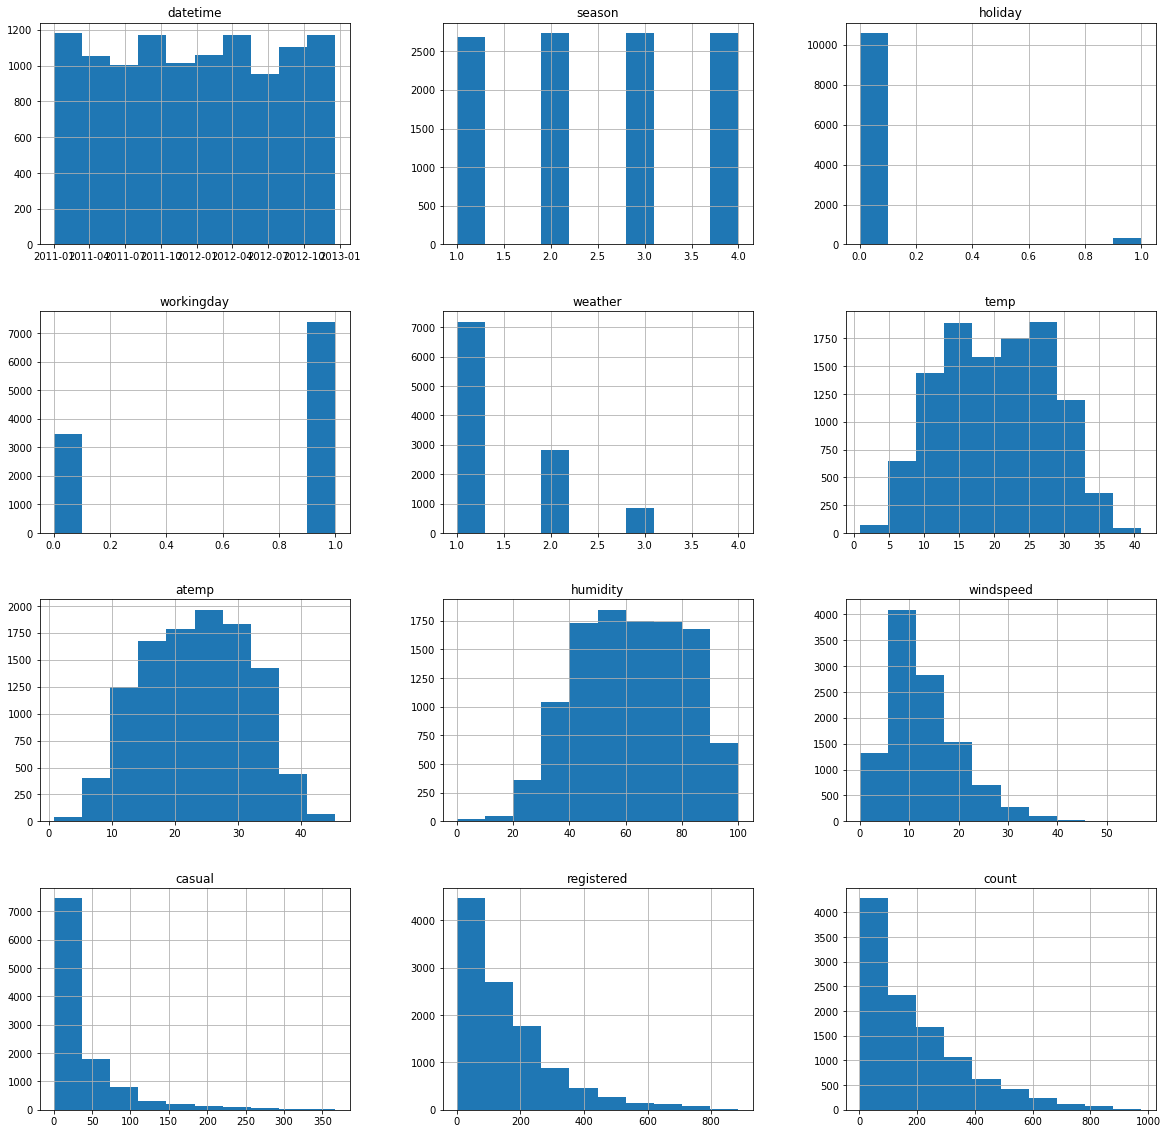

In [34]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(20,20))

In [35]:
# Extracting 'hour', 'dayofweek', 'month', and 'year' from 'datetime' and creating new features
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year

test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek
test['month'] = test['datetime'].dt.month
test['year'] = test['datetime'].dt.year

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>,
        <AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>],
       [<AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'dayofweek'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>]], dtype=object)

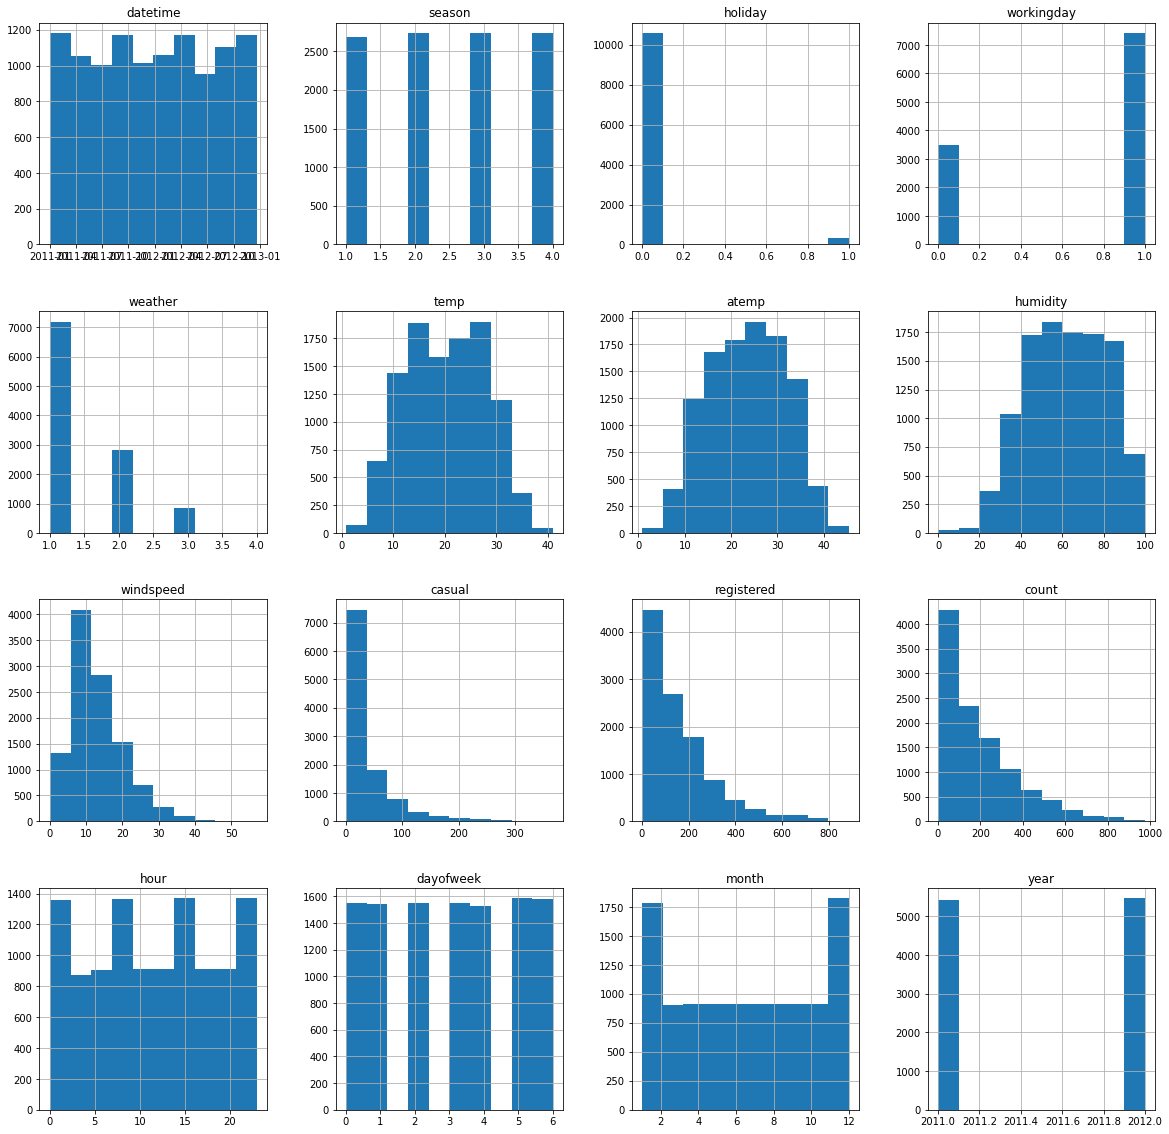

In [36]:
# Create a histogram of all features
train.hist(figsize=(20,20))

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [37]:
# Make 'season' and 'weather' features as categorical
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')

test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [38]:
# View are new feature
train.head()

             datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  dayofweek  month  \
0        81        0.0       3          13     16     0          5      1   
1        80        0.0       8          32     40     1          5      1   
2        80        0.0       5          27     32     2          5      1   
3        75        0.0       3          10     13     3          5      1   
4        75        0.0       0           1      1     4          5      1   

   year  
0  2011  
1  2011  
2  2011  
3  2011  
4  2011  

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'dayofweek'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

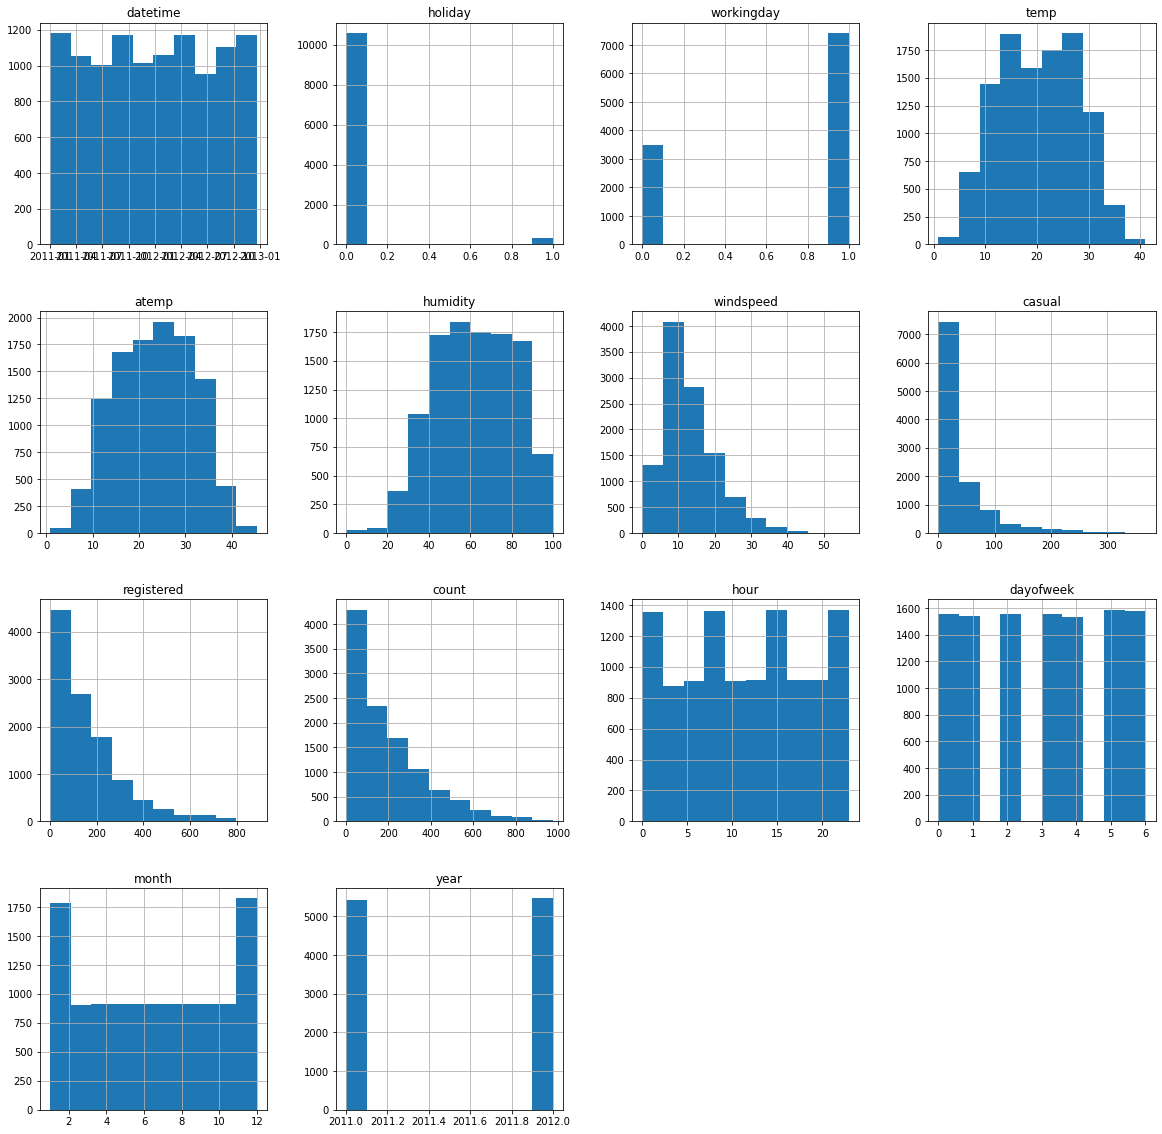

In [39]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20,20))

### Additional Feature Creation

Extracting additional time-related features such as day of the month, week of the year, quarter of the year.

In [42]:
train['dayofmonth'] = train['datetime'].dt.day
train['weekofyear'] = train['datetime'].dt.isocalendar().week
train['quarter'] = train['datetime'].dt.quarter

test['dayofmonth'] = test['datetime'].dt.day
test['weekofyear'] = test['datetime'].dt.isocalendar().week
test['quarter'] = test['datetime'].dt.quarter

In [43]:
train.head()

             datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  dayofweek  month  \
0        81        0.0       3          13     16     0          5      1   
1        80        0.0       8          32     40     1          5      1   
2        80        0.0       5          27     32     2          5      1   
3        75        0.0       3          10     13     3          5      1   
4        75        0.0       0           1      1     4          5      1   

   year  dayofmonth  weekofyear  quarter  
0  2011           1          52        1  


### Correlation Matrix Heat Map:

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = train.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


#### Analysis from Correlation Heat Map:

From the correlation matrix, we can observe the following key insights:

1. The "temp" and "atemp" features are highly correlated (0.984948), indicating a strong relationship between actual temperature and perceived temperature.

2. Bike sharing demand, represented by the "count" feature, shows positive correlations with "temp" (0.394454) and "atemp" (0.389784), suggesting that higher temperatures are associated with increased bike usage.

3. The "hour" feature has a positive correlation (0.400601) with the bike sharing demand, indicating that certain hours of the day have higher demand for bikes.

4. The "workingday" feature has a negative correlation (-0.704267) with the "dayofweek" feature, indicating that weekdays are typically associated with working days, while weekends have a higher likelihood of being non-working days or holidays.

5. The "month" feature exhibits a positive correlation (0.257589) with bike sharing demand, suggesting that bike usage varies across different months.

6. The "year" feature has a positive correlation (0.260403) with bike sharing demand, indicating that bike usage has increased over the years.

These insights highlight the influence of weather conditions, time of day, and calendar factors on bike sharing demand. They can help in understanding the key drivers of bike usage and inform strategies for optimizing bike sharing systems.

### Time Series of Bike-Sharing Demand

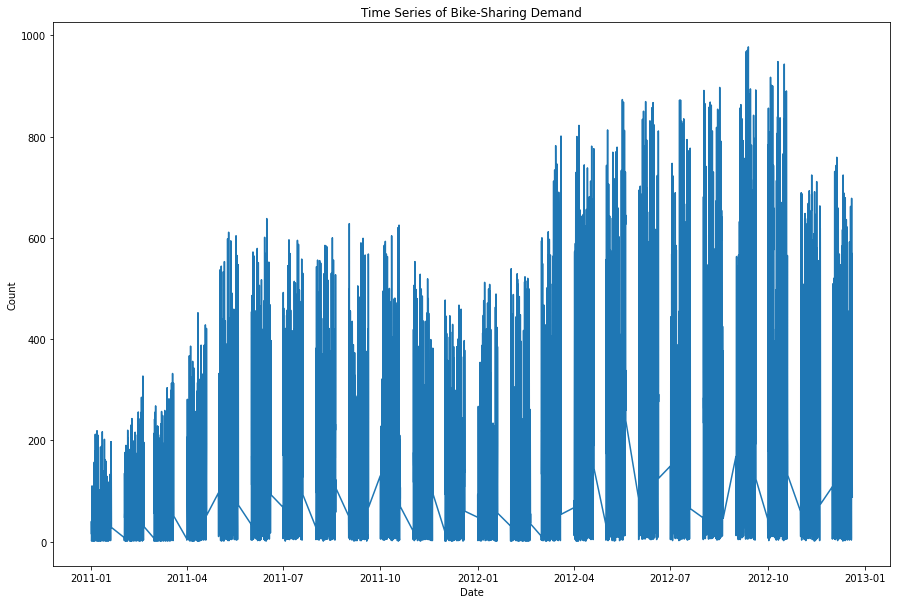

In [46]:
plt.figure(figsize=(15,10))
plt.plot(train['datetime'], train['count'])
plt.title('Time Series of Bike-Sharing Demand')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

#### Time Series of Bike-Sharing Demand

The Time Series of Bike-Sharing Demand plot showcases the trend of bike-sharing demand over time. Here are the key observations:

- The plot reveals a clear increasing trend in bike-sharing demand over the years, indicating a growing popularity of bike sharing as a mode of transportation.
- There are noticeable seasonal patterns in bike-sharing demand, with peaks during certain months or periods of the year. This suggests that factors such as weather and holidays influence the usage of bike-sharing services.
- The plot also shows fluctuations in demand within each year, indicating variations in bike-sharing usage across different seasons or months.

Understanding the time series patterns of bike-sharing demand can help in identifying the factors that drive the demand and can aid in making informed decisions related to resource allocation, marketing strategies, and service optimization.

### Pairplot for Multivariate Analysis:

In [50]:
sns.pairplot(train)
plt.show()

#### sns.pairplot Analysis

The `sns.pairplot` function provides a visual representation of the relationships between pairs of features in the Bike-Sharing Demand dataset. Here are the key observations from the pairplot:

- The distribution of the "count" feature shows a positive skew, indicating that bike-sharing demand is generally higher during certain periods.
- There is a strong positive correlation between the "count" feature and the "temp" and "atemp" features, suggesting that higher temperatures are associated with increased bike usage.
- The "count" feature also exhibits a positive correlation with the "hour" feature, indicating that certain hours of the day experience higher demand for bike sharing.
- The "count" feature shows a negative correlation with the "humidity" feature, suggesting that higher humidity levels are associated with lower bike-sharing demand.
- The "count" feature appears to have a positive correlation with the "month" and "year" features, indicating seasonal and yearly variations in bike-sharing demand.

Overall, the pairplot provides valuable insights into the relationships between features and their impact on bike-sharing demand.


## Step 5: Rerun the model with the same settings as before, just with more features

In [55]:
train = train.drop(columns=['casual', 'registered'])

# Define the TabularPredictor object
predictor_new_features = TabularPredictor(
    label="count",
    problem_type="regression",
    eval_metric="root_mean_squared_error"
)

# Fit the model
predictor_new_features.fit(train_data=train, time_limit=600, presets="best_quality")

predictor_new_features.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20230528_220520/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230528_220520/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 16
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
Cannot interpret 'UInt32Dtype()' as a data type
	Available Memory:                    1549.01 MB
	Train Data (Original)  Memory Usage: 1.21 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
Cannot interpret

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.348431      15.681876  557.767127                0.000849           0.315693            3       True         14
1          LightGBM_BAG_L2  -30.649798      14.173486  426.556313                0.395302          26.515152            2       True         11
2          CatBoost_BAG_L2  -30.680087      13.883778  464.998940                0.105594          64.957778            2       True         13
3        LightGBMXT_BAG_L2  -31.231659      14.556585  431.803588                0.778400          31.762426            2       True         10
4   RandomForestMSE_BAG_L2  -31.528455      14.401731  434.216078                0.623547          34.174917            2       True         12
5      WeightedEnsemble_L2  -32.157071      12.540704  351.006814         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.38623285339942,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.383

In [56]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    15.499533
1    11.199882
2    10.766752
3     9.099400
4     8.308702
Name: count, dtype: float32

In [57]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features < 0] = 0

In [60]:
# Same submitting predictions
submission_new_features = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [61]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 488kB/s]
Successfully submitted to Bike Sharing Demand

In [62]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-28 22:17:19  new features          complete  0.66081      0.66081       
submission.csv               2023-05-28 21:23:03  first raw submission  complete  1.78979      1.78979       


#### New Score of `0.66081`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [80]:
import autogluon.core as ag

nn_options = {  # Specifies non-default hyperparameter values for neural network models
    'num_epochs': 10,  'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),  'layers': ag.space.Categorical([100], [1000], [200, 100], [300, 200, 100]), 'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True), 'activation': ag.space.Categorical('relu', 'softrelu', 'tanh')
}

gbm_options = {   #hyperparameter - lightGBM gradient boosted trees
  'num_leaves': ag.space.Int(lower=26, upper=66, default=36), 'num_boost_round': 100,      
}

hyperparameters = {'GBM': gbm_options, 'NN': nn_options}

num_trials = 10  # Try at most 50 different hyperparameter configurations for each type of model
search_strategy = 'auto'  

hyperparameter_tune_kwargs = {  
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}


In [81]:
predictor_new_hpo = TabularPredictor(label="count", eval_metric="root_mean_squared_error").fit(
    train_data=train, 
    time_limit=600, 
    presets="best_quality", 
    hyperparameters=hyperparameters, 
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230528_225927/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230528_225927/"
AutoGluon Version:  0.6.2
Python Version:     3.7.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Apr 25 15:24:19 UTC 2023
Train Data Rows:    10886
Train Data Columns: 16
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

In [82]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3  -36.271977       0.003667  219.393433                0.001082           0.594797            3       True         15
1    LightGBM_BAG_L2/T2  -36.400794       0.002482  194.296825                0.000094          23.528380            2       True         10
2    LightGBM_BAG_L2/T1  -36.616293       0.002534  193.589968                0.000146          22.821523            2       True          9
3    LightGBM_BAG_L2/T3  -36.657726       0.002491  195.270256                0.000103          24.501811            2       True         11
4    LightGBM_BAG_L2/T5  -37.129110       0.002523  196.635863                0.000135          25.867418            2       True         13
5   WeightedEnsemble_L2  -37.639263       0.001453   47.865143                0.001244      

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T6': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T7': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T6': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -40.255448619289915,
  'LightGBM_BAG_L1/T2': -39.11247429212556,
  'LightGBM_BAG_L1/T3': -38.47246129942717,
  'LightGBM_BAG_L1/T4': -121.8293672105454,
  'LightGB

In [83]:
# Remember to set all negative values to zero
new_predictions_hpo = predictor_new_hpo.predict(test)
new_predictions_hpo[new_predictions_hpo<0] = 0

In [84]:
# Same submitting predictions
submission_new_hpo = pd.read_csv("sampleSubmission.csv", parse_dates=["datetime"])
submission_new_hpo["count"] = new_predictions_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [85]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 465kB/s]
Successfully submitted to Bike Sharing Demand

In [87]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-05-28 23:08:46  new features with hyperparameters  complete  0.47959      0.47959       
submission_new_hpo.csv       2023-05-28 22:47:01  new features with hyperparameters  complete  0.99321      0.99321       
submission_new_features.csv  2023-05-28 22:17:19  new features                       complete  0.66081      0.66081       
submission.csv               2023-05-28 21:23:03  first raw submission               complete  1.78979      1.78979       


#### New Score of `0.47959`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [89]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-53.099799, -30.348431, -36.271977 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

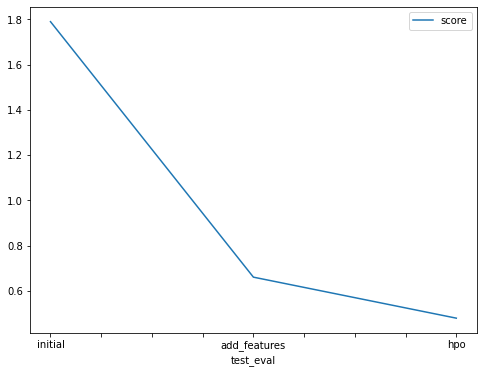

In [90]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.78979, 0.66081, 0.47959]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [91]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "timelimit": ["time_limit = 600", "time_limit=600", "time_limit=600"],
    "presets": ["presets='best_quality'", "presets='best_quality'", "presets='best_quality'"],
    "hp-method": ["none", "problem_type = 'regression'", "nn & GBM"],
    "score": [1.78979, 0.66081, 0.47959]
})

          model         timelimit                 presets  \
0       initial  time_limit = 600  presets='best_quality'   
1  add_features    time_limit=600  presets='best_quality'   
2           hpo    time_limit=600  presets='best_quality'   

                     hp-method    score  
0                         none  1.78979  
1  problem_type = 'regression'  0.66081  
2                     nn & GBM  0.47959  